In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2010-01-01'
end = '2025-01-15'

stock = "GOOG"
data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace = True)  #This method is used to reset the index of a Pandas DataFrame.
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2010-01-04,15.554351,15.610239,15.678981,15.547723,15.615220,78541293
1,2010-01-05,15.485855,15.541497,15.637387,15.480475,15.620949,120638494
2,2010-01-06,15.095475,15.149715,15.588072,15.102393,15.588072,159744526
3,2010-01-07,14.744061,14.797037,15.193053,14.760922,15.178109,257533695
4,2010-01-08,14.940615,14.994298,15.024933,14.672753,14.744733,189680313
...,...,...,...,...,...,...,...
3777,2025-01-07,196.710007,196.710007,202.139999,195.940002,198.270004,16966800
3778,2025-01-08,195.389999,195.389999,197.639999,193.750000,193.949997,14335300
3779,2025-01-10,193.169998,193.169998,197.619995,191.600006,195.419998,20753800


In [5]:
ma_100_days = data.Close.rolling(100).mean()

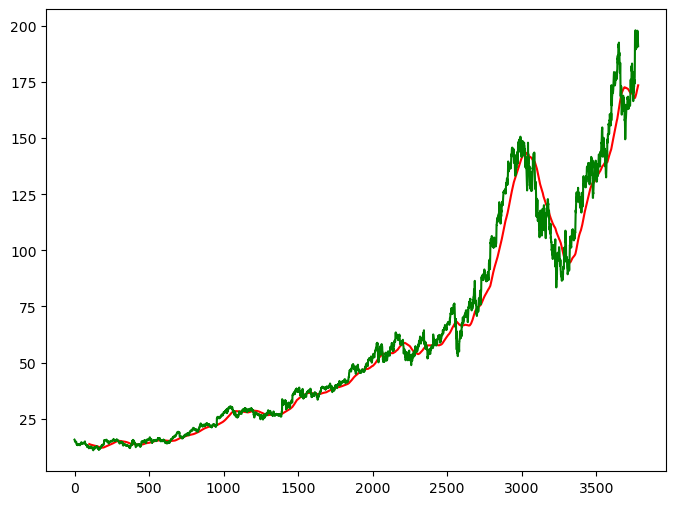

In [6]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days,'r')  # red color is moving average
plt.plot(data.Close,'g')

In [7]:
ma_200_days = data.Close.rolling(200).mean()

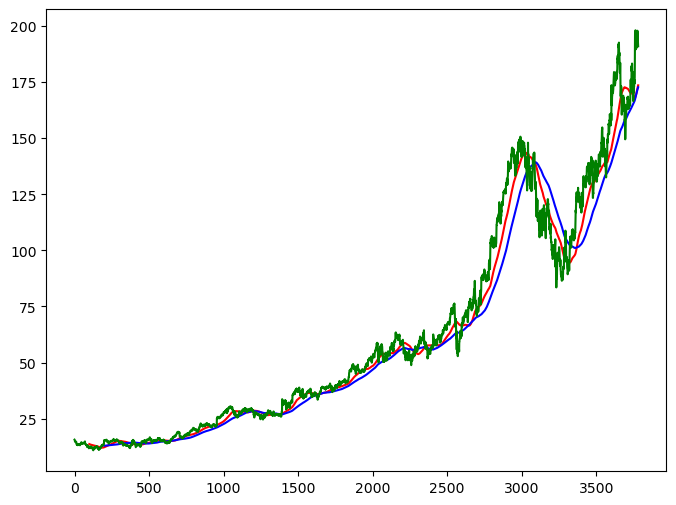

In [8]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days,'r')  # red color is moving average
plt.plot(ma_200_days,'b') 
plt.plot(data.Close,'g')

In [9]:
data.dropna(inplace = True)

In [10]:
# distribute the  data into 80/90 training or testing data
data_train =pd.DataFrame( data.Close[0:int(len(data)*0.80)])
data_test =pd.DataFrame( data.Close[int(len(data)*.80):len(data)])

In [11]:
data_train.size ,data_train.shape[0] 

(3025, 3025)

In [12]:
data_test.size ,data_test.shape[0]

(757, 757)

In [13]:
#Scaling in the form of 0,1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale  = scaler.fit_transform(data_train)
data_train_scale

array([[0.03395973],
       [0.03346818],
       [0.0306667 ],
       ...,
       [0.95500474],
       [0.90664507],
       [0.90591207]])

In [15]:
x= []
y= []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
len(x),len(y)
x,y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential


In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences= True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

c:\Users\Ravi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss ='mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size=32, verbose=1)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - loss: 0.0321
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - loss: 0.0043
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - loss: 0.0038
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - loss: 0.0027
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - loss: 0.0027
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.0024
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - loss: 0.0031
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 0.0024
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - loss: 0.0024
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.0022
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.0023
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.0017
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 0.0019
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.0021
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pass_100_days = data_train.tail(100)


In [24]:
data_test = pd.concat((pass_100_days,data_test),axis=0,ignore_index=True)
data_test.size

957

In [25]:
data_test_scale  = scaler.transform(data_test)
